In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

%matplotlib inline

In this notebook, we will deal with dirty datasets and try to turn them into cleaner structures. All the datasets in this notebook are from https://github.com/LinkedInLearning/data_cleaning_python_2883183

In [2]:
url = 'https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/'

Convert the following string to csv format and convert it into a dataframe

In [3]:
shop_card = '''date,name,amount,price
2021-03-01,carrot,7,5.73
2021-03-01,egg,12,1.7
2021-03-01,milk,,3.57
2021-03-01,potato,2,
,tomato,6,1.52
2021-03-02,potato,3,2.17
2021-03-03,,5,3.68'''

In [4]:
reader = csv.reader(shop_card.splitlines())

In [5]:
df = pd.DataFrame(list(reader))
df

,0,1,2,3
0,date,name,amount,price
1,2021-03-01,carrot,7,5.73
2,2021-03-01,egg,12,1.7
3,2021-03-01,milk,,3.57
4,2021-03-01,potato,2,
5,,tomato,6,1.52
6,2021-03-02,potato,3,2.17
7,2021-03-03,,5,3.68


Set the first row as header and drop it

In [6]:
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)

In [7]:
df

,date,name,amount,price
1,2021-03-01,carrot,7,5.73
2,2021-03-01,egg,12,1.7
3,2021-03-01,milk,,3.57
4,2021-03-01,potato,2,
5,,tomato,6,1.52
6,2021-03-02,potato,3,2.17
7,2021-03-03,,5,3.68


Convert the columns to their original datatypes

In [8]:
df['date'] = pd.to_datetime(df.date)

In [9]:
df.amount = pd.to_numeric(df.amount)
df.price = pd.to_numeric(df.price)

In [10]:
df.amount

1     7.0
2    12.0
3     NaN
4     2.0
5     6.0
6     3.0
7     5.0
Name: amount, dtype: float64

Note note that df.amount is in float format although all values are integer except a null value. This is because we don't have a special missing value for integers. We can convert it back to int32 as follows

In [11]:
df['name'] = df.name.astype(str)

In [12]:
df.isnull().any()

0
date       True
name      False
amount     True
price      True
dtype: bool

Although the name column has a one missing value, since we set shop_card as a string at the start, the null value are typed as an empty string "" instead of an actual null value.

Check if the rows have a missing value

In [13]:
df.isnull().any(axis=1)

1    False
2    False
3     True
4     True
5     True
6    False
7    False
dtype: bool

Read the new dataset from a github page 

In [14]:
url_data = (url + 'Ch01/01_03/metrics.csv')
df = pd.read_csv(url_data, parse_dates=True)
df.head()

,time,name,value
0,2021-07-13 14:36:52.380,mem,2.275172e+08
1,2021-07-13 14:36:52.380,cpu,3.157000e+01
2,2021-07-13 14:36:53.337,mem,2.275192e+08
3,2021-07-13 14:36:53.337,cpu,3.009000e+02
4,2021-07-13 14:36:54.294,mem,2.275157e+08


In [15]:
df.isnull().any()

time     False
name     False
value    False
dtype: bool

In [16]:
df.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

We can notice that there is an additional uppercase values for cpu, and the minimum value for cpu is negative, which is likely a bad data. First, get the number of rows where cpu is uppercase.

In [17]:
df.name.value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

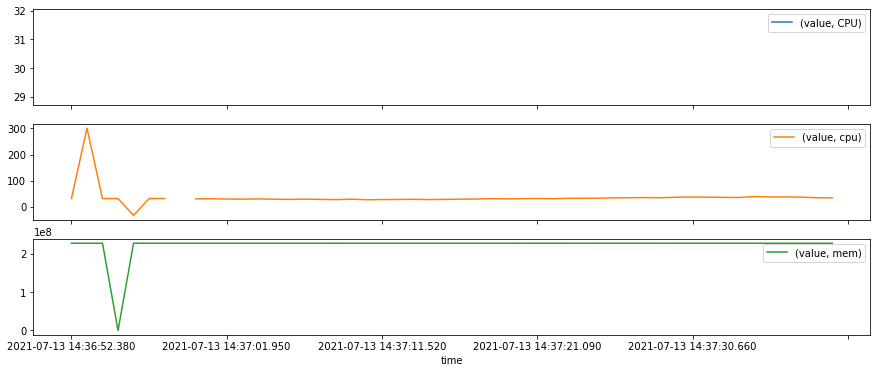

In [18]:
pd.pivot(df, index='time', columns='name').plot(subplots=True, figsize=(15,6));

These data viz can help us better to see the outliers in cpu. Now find those bad data with a query.

In [19]:
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [20]:
# Alternatively
df[(df.name == 'cpu') & ((df.value < 0) |( df.value > 100))]

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


Calculate z score for memory and find bad entry (those that are off the mean value by at least two times standard deviation)

In [21]:
mem = df[df.name == 'mem'].value
z_mem = (mem - mem.mean()) / mem.std()
bad_mem = mem[z_mem.abs() > 2]
bad_mem

6    295.0
Name: value, dtype: float64

Find the duplicates from the cart dataset

In [22]:
df = pd.read_csv(url + 'Ch01/01_04/cart.csv', parse_dates=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [23]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Additionally, we can find duplicates regarding only specified columns

In [24]:
df.duplicated(['name', 'amount'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

Validate the data in the ship dataset

In [25]:
df = pd.read_csv(url + 'Ch03/03_01/ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [26]:
df.dtypes

name     object
lat     float64
lng     float64
dtype: object

Define a schema for the ship dataset and put it into a validation test.

In [27]:
import pandera as pa

schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(pa.Float, 
                     nullable=True, 
                     checks=pa.Check(
                         lambda v: v >= -90 and v <= 90, 
                         element_wise=True)
                    ),
    'lng': pa.Column(pa.Float, 
                     nullable=True,
                     checks=pa.Check(
                         lambda v: v >= -180 and v <= 180, 
                         element_wise=True)
                    )
})

schema.validate(df)

C:\Users\Lenovo\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Lenovo\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Lenovo\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


Now, import the new ship dataset and check for null values

In [28]:
df = pd.read_csv(url + 'Ch03/03_03/ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
4,,20.664875,-80.709777


In [29]:
df.isnull().sum()

name    0
lat     1
lng     1
dtype: int64

We can see that isnull attribute doesn't notice the null value in the name column. Let's look at what we have in the last entry of name

In [30]:
df.iloc[-1]['name']

' '

Now, trim the white space in the last entry and check for the null values again

In [31]:
strip = df.name.str.strip() == ''
df.loc[strip, 'name'] = np.nan

df.isnull().any(axis=1)

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [32]:
df.isnull().any()

name    True
lat     True
lng     True
dtype: bool

Now, have a look at the height of some students in 1st and 12nd grade, and spot the erroneous entries 

In [33]:
df = pd.read_csv(url + 'Ch03/03_05/heights.csv')
df

,name,grade,height
0,Adam,1,31.7
1,Beth,1,74.9
2,Chris,12,72.3
3,Dana,12,61.8


In [34]:
max_height = pd.DataFrame([[1, 32]], columns=['grade', 'max_height']) # make the assumption that a 1st grade student can be at most 32 inches tall

# find the mistaken data
merged = pd.merge(df, max_height, how='left')
merged[merged.height > merged.max_height]

,name,grade,height,max_height
1,Beth,1,74.9,32.0


Now, import the dataset about contatining the name of a driver, license plate and distance state road. Validate this data by getting rid of <br> missing values, and negative distances, and plate values that don't contain at least 3 uppercase letters or digits.

In [35]:
df = pd.read_csv(url + 'Ch03/challenge/rides.csv')
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [36]:
# plate values must contain at least 3 characters

bad_plate = ~df.plate.str.match(r'[0-9A-Z]{3,}', na=False)
df[bad_plate]

,name,plate,distance
1,Morticia,NaN,2.1
2,Fester,,3.4
5,Wednesday,A,0.3


In [37]:
neg_distance = df.distance < 0
df[neg_distance]

,name,plate,distance
3,Lurch,Q38X3,-3.2


In [38]:
# final df
df[~(bad_plate | neg_distance)]

,name,plate,distance
0,Gomez,1XZ2,3.70
4,NaN,03A,14.30
6,Pugsley,ZF003,153.14


In [39]:
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


# Serialization Formats

Let's first generate a dataframe with some random values for cpu 

In [40]:
size = 5
df = pd.DataFrame({
    'time': pd.date_range('2022-06-26', freq='30s',  periods=size),
    'name': ['cpu']*size,
    'value': np.random.rand(size)
    
})
df

,time,name,value
0,2022-06-26 00:00:00,cpu,0.911276
1,2022-06-26 00:00:30,cpu,0.181125
2,2022-06-26 00:01:00,cpu,0.795912
3,2022-06-26 00:01:30,cpu,0.767832
4,2022-06-26 00:02:00,cpu,0.394241


In [41]:
# Now define apache arrow schema

import pyarrow as pa 
schema = pa.schema([
    ('time', pa.timestamp('ms')),
    ('name', pa.string()),
    ('value', pa.float64())
])

In [42]:
# save it as a parquet 

out_file = 'metrics.parquet'
df.to_parquet(out_file, schema=schema)

In [43]:
pd.read_parquet(out_file)

,time,name,value
0,2022-06-26 00:00:00,cpu,0.911276
1,2022-06-26 00:00:30,cpu,0.181125
2,2022-06-26 00:01:00,cpu,0.795912
3,2022-06-26 00:01:30,cpu,0.767832
4,2022-06-26 00:02:00,cpu,0.394241


Parquet will save us a lot of trouble in the future when we mess up with data. For instance, changing the type of time column will raise an error.

In [44]:
df.time = df.time.astype('str')
df.to_parquet(out_file, schema=schema)

ArrowTypeError: ("object of type <class 'str'> cannot be converted to int", 'Conversion failed for column time with type object')

In [ ]:
terminal

In [ ]:
$sha256sum metrics.csv

## Data Pipeline 

In [45]:
from invoke import task

In [46]:
def load_csv(csv_file):
    return pd.read_csv(csv_file, parse_dates=['start', 'end'])

In [47]:
load_csv(url + 'Ch04/04_03/rides.csv')

,car,start,end,charge
0,c1,2021-06-27 08:32:00,2021-06-27 08:47:00,17.3
1,c2,2021-06-27 09:07:00,2021-06-27 09:10:00,3.3
2,c2,2021-06-27 09:23:00,2021-06-27 09:42:00,30.6
3,c1,2021-06-27 09:33:00,2021-06-27 09:47:00,5.8


In [48]:
def validate(df):
    bad_time = df.query('start >= end')
    if len(bad_time) > 0:
        raise ValueError(bad_time)

In [49]:
@task
def etl(ctx, csv_file):
    df = load_csv(file)
    validate(df)
    
    db_file = f'rides.db'
    conn = sqlite3.connect(db_file)
    df.to_sql('rides', conn, index=False, if_exists='append')


In [50]:
load_csv(url + 'Ch04/04_03/rides.csv')

,car,start,end,charge
0,c1,2021-06-27 08:32:00,2021-06-27 08:47:00,17.3
1,c2,2021-06-27 09:07:00,2021-06-27 09:10:00,3.3
2,c2,2021-06-27 09:23:00,2021-06-27 09:42:00,30.6
3,c1,2021-06-27 09:33:00,2021-06-27 09:47:00,5.8


Now, we insert the dataset into a SQL database in a terminal 

In [51]:
# $ invoke --list

# $ invoke etl--csv-file rides.csv

# $ sqlite3 rides.db

# sqlite> .schema

# sqlite> select * from rides.db

## Transactions 

In [52]:
import sqlite3

In [53]:
df = pd.read_csv(url + 'Ch04/04_04/ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [54]:
# Define a schema that doesn't allow for null values for latitude and longitude in a ship dataframe
schema = '''
CREATE TABLE ships(
    name TEXT,
    lat FLOAT NOT NULL,
    lng FLOAT NOT NULL
)    
'''

In [57]:
db_file = 'ships_2.db'
conn =  sqlite3.connect(db_file)
conn.executescript(schema)

In [58]:
# Notice that the following transaction will raise an error since we have null values in the actual dataframe
try:
    with conn as cur:
        cur.execute('BEGIN')
        df.to_sql('ships', conn, if_exists='append', index=False)
finally:
    conn.close()

IntegrityError: NOT NULL constraint failed: ships.lat

In [118]:
dateutil.parser.isoparse(df.iloc[2]['time'])

datetime.datetime(2017, 6, 19, 14, 3, 42)

In [117]:
import dateutil.parser
df

,ip,time,path,status,size
0,108.66.146.1,2017-06-19T14:03:00,/images,200,1095
1,108.66.146.3,2017-06-19T14:03:21,/posts,200,1572
2,108.66.146.6,2017-06-19T14:03:42,/posts,200,1174
3,108.66.146.1,2017-06-19T14:04:03,/users,200,684
4,108.66.146.1,2017-06-19T14:04:24,/images,400,0
...,...,...,...,...,...
123,108.66.146.5,2017-06-19T14:46:03,/posts,200,1750
124,108.66.146.3,1017-06-19T14:46:24,/users,200,1079
125,108.66.146.1,2017-06-19T14:46:45,/images,200,1064
126,108.66.146.5,2017-06-19T14:47:06,/health,200,1531


In [113]:
parser = lambda time: pd.datetime.strptime(time, '%d%b%Y')  pd.datetime.strptime(date, '%d%b%Y')

Index(['ip', 'time', 'path', 'status', 'size'], dtype='object')

In [143]:
parser = lambda time: dateutil.parser.isoparse(time)
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch04/solution/traffic.csv', parse_dates=['time'], date_parser=parser)
df.dtypes

ip                object
time      datetime64[ns]
path              object
status             int64
size               int64
dtype: object

In [155]:
from contextlib import closing
from http import HTTPStatus
from ipaddress import ip_address

status_codes = set(HTTPStatus)
max_bad_percent = 5

def validate_row(row):
    
    if row['status'] not in status_codes:
        return False
    
    # time cannot be greater than the current time
    if row['time'] > pd.Timestamp.now():
        return False
    
    if pd.isnull(row['path']) or not row['path'].strip():
        return False
    
    try:
        ip_address(row['ip'])
    except ValueError:
        return False
    
    # size can't be negative or empty
    if pd.isnull(row['size']) or row['size'] < 0:
        return False
    
    return True

In [157]:
def etl(csv_file, db_file):
    df = pd.read_csv(csv_file, parse_dates=['time'])
    
    bad_rows = df[~df.apply(validate_row, axis=1)]
    if len(bad_rows) > 0:
        bad_percentage = len(bad_rows) / len(df) * 100
        if bad_percentage >= 5:
            raise ValueError('too many bad rows ({bad_percentage:.2f}%)')
            
    df = df[~df.index.isin(bad_rows.index)]        
    with closing(sqlite3.connect(db_file)) as conn:
        conn.execute('BEGIN')
        with conn:
            df.to_sql('traffic', conn, if_exists='append', index=False)

if __name__ == '__main__':
    etl(url + 'Ch04/solution/traffic.csv', 'traffic.db')            

In [169]:
def etl(csv_file, db_file):
    df = pd.read_csv(csv_file, parse_dates=['time'])
    
    bad_rows = df[~df.apply(validate, axis=1)]
    if len(bad_rows) > 0:
        bad_percentage = len(bad_rows) / len(df) * 100
        print(f'{len(bad_rows)} ({bad_percentage:.2f}%) bad rows')
        if bad_percentage >= 5:
            raise ValueError('too many bad rows ({bad_percentage:.2f}%)')
            
    df = df[~df.index.isin(bad_rows.index)]        
    with closing(sqlite3.connect(db_file)) as conn:
        conn.execute('BEGIN')
        with conn:
            df.to_sql('traffic', conn, if_exists='append', index=False)
            
if __name__ == '__main__':
    etl(url + 'Ch04/solution/traffic.csv', 'traffic.db')

5 (3.91%) bad rows


## Rename

In [173]:
df = pd.read_csv(url + '/Ch05/05_01/weather.csv')
df

,DATE,TMIN,TMAX
0,2021-04-25,18,28
1,2021-04-26,16,23
2,2021-04-27,17,24
3,2021-04-28,15,25
4,2021-04-29,17,28


In [176]:
# rename columns
df.rename(columns={'DATE': 'date', 'TMIN':'min_date', 'TMAX': 'max_date'}, inplace=True)

In [177]:
df

,date,min_date,max_date
0,2021-04-25,18,28
1,2021-04-26,16,23
2,2021-04-27,17,24
3,2021-04-28,15,25
4,2021-04-29,17,28


In [208]:
# Now perform a more trickier renaming
df = pd.read_csv(url + '/Ch05/05_01/donations.csv')
df

,1. First Name,2. Last Name,3. Donation Amount
0,Amy,Wang,200
1,Bender,Rodriguez,12
2,Philip,Fry,70


In [209]:
def re_col(col):
    return re.sub(r'\d+\.\s+', '', col).lower().replace(' ', '_')

In [210]:
df.rename(columns=re_col, inplace=True)
df

,first_name,last_name,donation_amount
0,Amy,Wang,200
1,Bender,Rodriguez,12
2,Philip,Fry,70


## Fixing data types

In [211]:
df = pd.read_csv(url + 'Ch05/05_02/points.csv')
df

,x,y,color,visible
0,1,1,0xFF0000,yes
1,2,2,0x00FF00,no
2,3,3,0x0000FF,yes


In [212]:
df.dtypes

x           int64
y           int64
color      object
visible    object
dtype: object

In [217]:
def asint(color):
    return int(color, base=0)

In [220]:
df['color']  = df.color.apply(asint)

In [221]:
df.color

0    16711680
1       65280
2         255
Name: color, dtype: int64

In [223]:
bools = {'yes': True, 'no': False}
df.visible = df.visible.map(bools)

In [224]:
df.dtypes

x          int64
y          int64
color      int64
visible     bool
dtype: object

## Joining and splitting data

In [238]:
file_name = '2021-06.csv'

df = pd.read_csv(url + 'Ch05/05_03/2021-06.csv')
df

,day,time,client
0,1,09:00-11:00,ecorp
1,1,12:00-18:00,allsafe
2,2,10:00-19:30,allsafe
3,3,11:30-17:00,ecorp


In [239]:
# add a new column showing the date written in the file name
df['date'] = file_name[:-len('.csv')]
df

,day,time,client,date
0,1,09:00-11:00,ecorp,2021-06
1,1,12:00-18:00,allsafe,2021-06
2,2,10:00-19:30,allsafe,2021-06
3,3,11:30-17:00,ecorp,2021-06


In [242]:
times = df.time.str.split('-', expand=True)
times.columns = ['start', 'end']
times

,start,end
0,09:00,11:00
1,12:00,18:00
2,10:00,19:30
3,11:30,17:00


In [231]:
def hour_day(row):
    return row.split('-')[0], row.split('-')[1]

In [246]:
df = pd.concat([df, times], axis=1)
df

,day,time,client,date,start,end
0,1,09:00-11:00,ecorp,2021-06,09:00,11:00
1,1,12:00-18:00,allsafe,2021-06,12:00,18:00
2,2,10:00-19:30,allsafe,2021-06,10:00,19:30
3,3,11:30-17:00,ecorp,2021-06,11:30,17:00


In [252]:
df['start'] = pd.to_datetime(df.date.str.cat(df.start, sep='T'))
df['end'] = pd.to_datetime(df.date.str.cat(df.end, sep='T'))

In [253]:
df

,day,time,client,date,start,end
0,1,09:00-11:00,ecorp,2021-06,2021-06-01 09:00:00,2021-06-01 11:00:00
1,1,12:00-18:00,allsafe,2021-06,2021-06-01 12:00:00,2021-06-01 18:00:00
2,2,10:00-19:30,allsafe,2021-06,2021-06-01 10:00:00,2021-06-01 19:30:00
3,3,11:30-17:00,ecorp,2021-06,2021-06-01 11:30:00,2021-06-01 17:00:00


In [254]:
# we can carry out simple calculations with datetimes now
df['end'] - df['start']

0   0 days 02:00:00
1   0 days 06:00:00
2   0 days 09:30:00
3   0 days 05:30:00
dtype: timedelta64[ns]

In [255]:
max(df['end'])

Timestamp('2021-06-01 19:30:00')

In [256]:
df['start'].mean()

Timestamp('2021-06-01 10:37:30')

## Deleting bad data

In [313]:
# delete the rows that have no name or distance with zero or less
df = pd.read_csv(url + 'Ch05/05_04/rides.csv')
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [314]:
bad = df.eval('name.isnull() | distance <= 0')
df = df[~bad]

df.reset_index(inplace=True)
df = df.drop(['index'], axis=1)

In [315]:
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Wednesday,A,0.30
4,Pugsley,ZF003,153.14


## Filling missing values

In [317]:
df = pd.read_csv(url + 'Ch05/05_05/cart.csv')
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [320]:
df.amount.fillna(1, inplace=True)

In [321]:
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,1.0,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [325]:
# fill the names with the most common name
most_common = df.name.mode()[0]
df.name.fillna(most_common, inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,1.0,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,potato,5.0,3.68


In [329]:
# fill the nan date values with the date in previous row. ffil attribute is a great option for timeseries dataframes
df.date.fillna(method='ffill', inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,1.0,3.57
3,2021-03-01,potato,2.0,NaN
4,2021-03-01,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,potato,5.0,3.68


In [337]:
# fill the nan prices with the average price of the products
mean_prices = df.groupby('name').price.transform(np.mean)
df.price.fillna(mean_prices, inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.730
1,2021-03-01,egg,12.0,1.700
2,2021-03-01,milk,1.0,3.570
3,2021-03-01,potato,2.0,2.925
4,2021-03-01,tomato,6.0,1.520
5,2021-03-02,potato,3.0,2.170
6,2021-03-03,potato,5.0,3.680


In [451]:
## Reshaping data
df = pd.read_csv(url + 'Ch05/05_06/metrics.csv')
df

,time,cpu,memory
0,2021-07-23T14:33:04,30.2,571.83
1,2021-07-23T14:44:05,32.9,524.72
2,2021-07-23T14:55:06,37.1,617.90


In [452]:
df = df.melt(id_vars=['time'], value_vars=['cpu', 'memory'], var_name='metric')
df

,time,metric,value
0,2021-07-23T14:33:04,cpu,30.20
1,2021-07-23T14:44:05,cpu,32.90
2,2021-07-23T14:55:06,cpu,37.10
3,2021-07-23T14:33:04,memory,571.83
4,2021-07-23T14:44:05,memory,524.72
5,2021-07-23T14:55:06,memory,617.90


 Transform the following dataframe into a more succinct format

In [472]:
df = pd.read_csv(url + 'Ch05/challenge/workshops.csv')
df

,Year,Month,Start,End,Name,Earnings
0,2021.0,NaN,NaN,NaN,NaN,NaN
1,NaN,June,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,3.0,gRPC in Go,"$33,019"
3,NaN,NaN,7.0,10.0,Optimizing Python,"$42,238"
4,NaN,NaN,28.0,30.0,python Foundations,"$24,372"
5,NaN,July,NaN,NaN,NaN,NaN
6,NaN,NaN,5.0,8.0,go concurrency,"$46,382"
7,NaN,NaN,21.0,22.0,Writing Secure Go,"$27,038"


In [473]:
df.Year.fillna(method='ffill', inplace=True)
df.Month.fillna(method='ffill', inplace=True)
df

,Year,Month,Start,End,Name,Earnings
0,2021.0,NaN,NaN,NaN,NaN,NaN
1,2021.0,June,NaN,NaN,NaN,NaN
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019"
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238"
4,2021.0,June,28.0,30.0,python Foundations,"$24,372"
5,2021.0,July,NaN,NaN,NaN,NaN
6,2021.0,July,5.0,8.0,go concurrency,"$46,382"
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038"


In [474]:
# drop the rows with na Earnings as those just indicate date which we now have in all rows.
df = df[pd.notnull(df.Earnings)].copy()
df

,Year,Month,Start,End,Name,Earnings
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019"
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238"
4,2021.0,June,28.0,30.0,python Foundations,"$24,372"
6,2021.0,July,5.0,8.0,go concurrency,"$46,382"
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038"


In [475]:
def as_date(row, col):
    year = int(row['Year'])
    month = row['Month']
    day = int(row[col])
    ts =  f'{month} {day}, {year}'
    
    return pd.to_datetime(ts, format='%B %d, %Y')

In [476]:
df['Start'] =  df.apply(as_date, axis=1, args=('Start', ))
df['End'] = df.apply(as_date, axis=1, args=('End',))
df

,Year,Month,Start,End,Name,Earnings
2,2021.0,June,2021-06-01,2021-06-03,gRPC in Go,"$33,019"
3,2021.0,June,2021-06-07,2021-06-10,Optimizing Python,"$42,238"
4,2021.0,June,2021-06-28,2021-06-30,python Foundations,"$24,372"
6,2021.0,July,2021-07-05,2021-07-08,go concurrency,"$46,382"
7,2021.0,July,2021-07-21,2021-07-22,Writing Secure Go,"$27,038"


In [477]:
def topic(row):
    try:
        if 'go' in row.lower():
            return 'go'
        elif 'python' in row.lower():
            return 'python'
    except:
        pass

In [478]:
df['Topic'] =  df.Name.apply(topic)
df

,Year,Month,Start,End,Name,Earnings,Topic
2,2021.0,June,2021-06-01,2021-06-03,gRPC in Go,"$33,019",go
3,2021.0,June,2021-06-07,2021-06-10,Optimizing Python,"$42,238",python
4,2021.0,June,2021-06-28,2021-06-30,python Foundations,"$24,372",python
6,2021.0,July,2021-07-05,2021-07-08,go concurrency,"$46,382",go
7,2021.0,July,2021-07-21,2021-07-22,Writing Secure Go,"$27,038",go


In [479]:
df['earnings'] =  pd.to_numeric(df.Earnings.str.replace(r'[$,]', '')).astype(np.float64)

<ipython-input-479-b762f2b02f7e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['earnings'] =  pd.to_numeric(df.Earnings.str.replace(r'[$,]', '')).astype(np.float64)


In [480]:
df

,Year,Month,Start,End,Name,Earnings,Topic,earnings
2,2021.0,June,2021-06-01,2021-06-03,gRPC in Go,"$33,019",go,33019.0
3,2021.0,June,2021-06-07,2021-06-10,Optimizing Python,"$42,238",python,42238.0
4,2021.0,June,2021-06-28,2021-06-30,python Foundations,"$24,372",python,24372.0
6,2021.0,July,2021-07-05,2021-07-08,go concurrency,"$46,382",go,46382.0
7,2021.0,July,2021-07-21,2021-07-22,Writing Secure Go,"$27,038",go,27038.0


In [481]:
df = df[['Start', 'End', 'Name', 'Topic', 'Earnings']]
df

,Start,End,Name,Topic,Earnings
2,2021-06-01,2021-06-03,gRPC in Go,go,"$33,019"
3,2021-06-07,2021-06-10,Optimizing Python,python,"$42,238"
4,2021-06-28,2021-06-30,python Foundations,python,"$24,372"
6,2021-07-05,2021-07-08,go concurrency,go,"$46,382"
7,2021-07-21,2021-07-22,Writing Secure Go,go,"$27,038"
